# Bayesian Inference

## 4.1 Bayes Rule

##### Example 4.2

In [1]:
K = 0.001
or = 3
q = c(0.64, 0.32, 0.04) # controls are like population for a low prevalance disease
a = c(1, q[2]/q[1]*or, q[3]/q[1]*or^2) # See GWAS 1 for how to get case freqs from controls and OR
f0 = 1 / sum(a) # P(X=0|D)
f = f0 * a # case frequencies
rbind(cases=f, controls=q)

cases,0.3265306,0.4897959,0.1836735
controls,0.6400000,0.3200000,0.0400000


In [2]:
rbind(genotype=c(0, 1, 2), risk=K*f/q)

genotype,0.0000000000,1.000000000,2.000000000
risk,0.0005102041,0.001530612,0.004591837


## 4.2 Probability model for observed GWAS data

##### Example 4.3

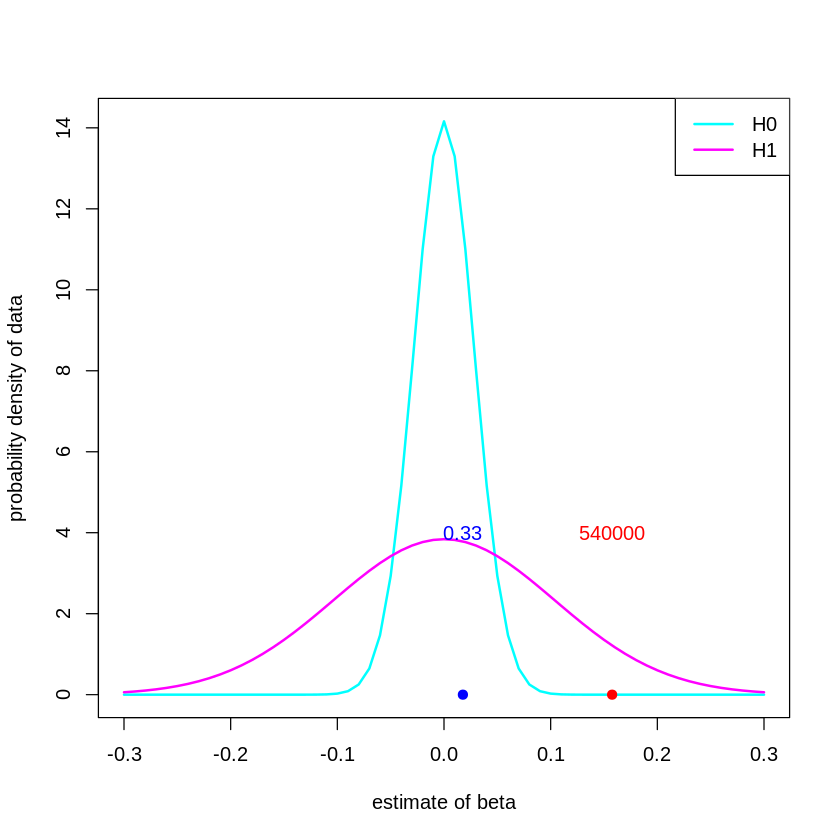

In [3]:
n = 3000 # sample size for SE calculation
f = 0.30 # MAF for SE calculation
sigma = 1 # error SD
se = sigma  / sqrt(2*f*(1-f)*n) # SE for QT GWAS
tau = 0.10 # prior standard deviation for the effect size beta under H1

# Let's draw the probability densities of data under the two models
# H0 and H1 as a function of MLE estimate
x = seq(-0.3, 0.3, by=0.01)
y1 = dnorm(x, 0, sqrt(tau^2 + se^2))
y0 = dnorm(x, 0, se)
plot(x, y0, t="l", col="cyan", lwd=2, xlab="estimate of beta", ylab="probability density of data")
lines(x, y1, col="magenta", lwd=2)
legend("topright", c("H0", "H1"), col=c("cyan", "magenta"), lwd=2)

# We make a shortcut and don't simulate data at all, but we simulate estimates
# Suppose we have two cases, first is null, second is alternative (true betas are 0 and 0.20)
b = c(0, 0.2)
b.est = rnorm(2, b, se) # these are the simulated estimates: true means and Gaussian noise determined by SE
points(b.est, c(0, 0), pch=19, col=c("blue", "red"))
# Next: log of Bayes factor of H1 vs H0, explained below
#       use log scale to avoid inaccuracies
log.bf.10 = dnorm(b.est, 0, sqrt(tau^2 + se^2), log=T) - dnorm(b.est, 0, se, log=T)
bf.10 = exp(log.bf.10) # then turn the log scale to Bayes factor scale
text(b.est[1], 4, signif(bf.10[1], 2), col="blue")
text(b.est[2], 4, signif(bf.10[2], 2), col="red")

## 4.3 Bayes Factor

In [4]:
post.odds = bf.10 * 1e-6 / (1 - 1e-6) # P(H_1|D) / P(H_0|D)
post.prob = post.odds / (1 + post.odds) # P(H_1|D)
paste(post.prob)

[1] "3.25644422646791e-07" "0.349530056128238"

In [5]:
pchisq((b.est/se)^2, df=1, lower=F)

[1] 5.295624e-01 2.210368e-08

## 4.4 Approximate Bayes factor in GWAS

##### Example 4.4

In [6]:
v = 1 # Set this to the phenotypic variance
p = 0.01 # effect explains less than 10% of the trait variance
target.prob = 0.95 # with this probability
maf = 0.25
# 2*maf*(1-maf)*b^2 = p*v --> b = +/- sqrt(p*v/(2*maf*(1-maf)))
b = sqrt(p*v / (2*maf*(1-maf)))
tau.seq = seq(0, 1, 0.001) # grid to evaluate tau
x = pnorm(b, 0, tau.seq, lower=F) # what is the upper tail probability at b for each value of tau?
tau.1 = tau.seq[which.min(abs(x - (1 - target.prob)/2) )] # which is closest to the target
# Check that the probablity mass in (-b, +b) is indeed  close to target
print(paste0("tau.1=", tau.1, " has mass ", signif(1 - 2*pnorm(b, 0, tau.1, lower=F), 3),
             " in (-", signif(b, 4), ", ", signif(b, 4), ")."))

[1] "tau.1=0.083 has mass 0.951 in (-0.1633, 0.1633)."


##### Example 4.5

In [7]:
or = 1.30 # effect is atmost this large
target.prob = 0.95 # with this prob
b = log(or)
tau.seq = seq(0, 1, 0.001) # grid to evaluate tau
x = pnorm(b, 0, tau.seq, lower=F) # what is the upper tail probabilty at b for each value of tau?
tau.1 = tau.seq[which.min(abs(x - (1 - target.prob)/2) )] # which is closest to the target prob?
# Check that the probability mass in (-b, b) is indeed close to target
print(paste0("tau.1 = ", tau.1, " has mass ", signif(1 - 2*pnorm(b, 0, tau.1, lower=F), 3),
             " in (-", signif(b, 4), ", ", signif(b, 4), ")."))

[1] "tau.1 = 0.134 has mass 0.95 in (-0.2624, 0.2624)."
